In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#read data
df = pd.read_csv('../../../Data/Cluster.csv',index_col='T',parse_dates=True)
A = df.as_matrix()
A = np.vstack([A, [8,1]])


In [3]:
#scale data with 1/ std x sqrt(2)
weight = np.sqrt(2)*np.std(A,axis=0)
A_scaled = A/weight

In [4]:
k_means = KMeans(n_clusters=2, n_init=10,init='random')
k_means.fit(A_scaled)
labels = k_means.labels_
centers = k_means.cluster_centers_


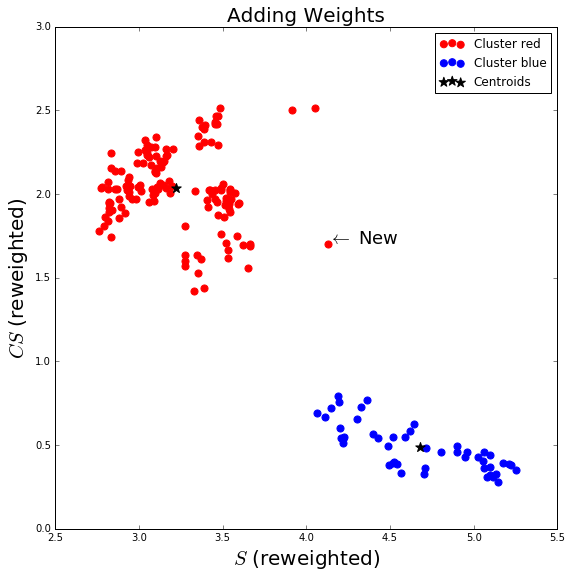

In [5]:
fig = plt.figure(figsize=[9,9])
idx_0 = labels ==1
plt.scatter(A_scaled[idx_0,0],A_scaled[idx_0,1],s=50,color='red',label='Cluster red')
idx_0 = labels ==0
plt.scatter(A_scaled[idx_0,0],A_scaled[idx_0,1],s=50,color='blue',label='Cluster blue')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,marker='*',color='black',label='Centroids')
plt.xlabel('$S$ (reweighted)',fontsize=20)
plt.ylabel('$CS$ (reweighted)',fontsize=20)
plt.title('Adding Weights',fontsize=20)
plt.annotate('$\leftarrow$ New',xy=(A_scaled[-1,0],A_scaled[-1,1]),fontsize=18)
plt.legend()

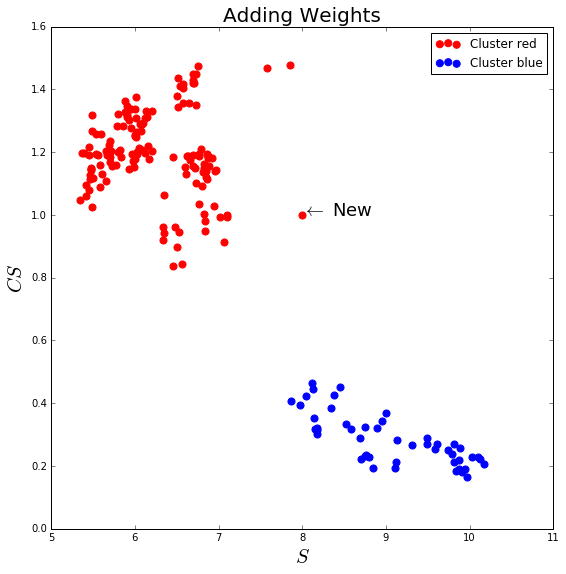

In [6]:
fig = plt.figure(figsize=[9,9])
idx_0 = labels ==1
plt.scatter(A[idx_0,0],A[idx_0,1],s=50,color='red',label='Cluster red')
idx_0 = labels ==0
plt.scatter(A[idx_0,0],A[idx_0,1],s=50,color='blue',label='Cluster blue')
plt.xlabel('$S$',fontsize=20)
plt.ylabel('$CS$',fontsize=20)
plt.title('Adding Weights',fontsize=20)
plt.annotate('$\leftarrow$ New',xy=(A[-1,0],A[-1,1]),fontsize=18)
plt.legend()